**Este análisis busca evaluar las tendencias de emisiones de gases de efecto invernadero (GEI) por país y sector entre 2000 y 2023. El enfoque estará en:**

- Identificar los países más emisores.
- Observar cambios a lo largo del tiempo.
- Comparar niveles de emisiones antes y después de políticas climáticas clave.
- Producir visualizaciones que faciliten la comprensión de estos datos.

In [54]:
## Instalar e Importar librerias
import sys
print(sys.executable)
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install matplotlib seaborn
import xlrd
print(xlrd.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Python313\python.exe
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
2.0.1



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Emisiones anuales CO por Región

anual_co_emissions_region = pd.read_csv("C:/Users/RAC-BELLABFES/Desktop/Proyecto Final/annual-co-emissions-by-region.csv")
print("OWID")

OWID


In [28]:
# OWID - Emisiones globales

greenhouse = pd.read_csv("greenhouse-gas-emissions.csv")
print("Our World in Data (OWID)")

Our World in Data (OWID)


In [26]:
anual_co_emissions_region.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions',
       'Annual CO₂ emissions.1'],
      dtype='object')

In [29]:
greenhouse.columns

Index(['Entity', 'Year', 'Annual greenhouse gas emissions in CO₂ equivalents'], dtype='object')

In [30]:
anual_co_emissions_region = anual_co_emissions_region.drop(columns=['Annual CO₂ emissions.1'])
# Eliminamos valores nulos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Annual CO₂ emissions'])
# Revisar datos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Year'])
anual_co_emissions_region['Year'] = anual_co_emissions_region['Year'].astype(int)

In [31]:
anual_co_emissions_region

,Entity,Code,Year,Annual CO₂ emissions
0,Africa,NaN,1884,2.198400e+04
1,Africa,NaN,1885,3.664000e+04
2,Africa,NaN,1886,4.763200e+04
3,Africa,NaN,1887,4.763200e+04
4,Africa,NaN,1888,8.060800e+04
...,...,...,...,...
2263,United States,USA,2019,5.262145e+09
2264,United States,USA,2020,4.714628e+09
2265,United States,USA,2021,5.032213e+09
2266,United States,USA,2022,5.078871e+09


In [32]:
greenhouse

,Entity,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,1850,7435743.5
1,Afghanistan,1851,7499858.5
2,Afghanistan,1852,7560495.5
3,Afghanistan,1853,7619898.0
4,Afghanistan,1854,7678120.0
...,...,...,...
37405,Zimbabwe,2019,34347856.0
37406,Zimbabwe,2020,31322906.0
37407,Zimbabwe,2021,33549390.0
37408,Zimbabwe,2022,33772416.0


In [56]:
print(type(anual_co_emissions_region))

<class 'pandas.core.frame.DataFrame'>


In [33]:
# Convertir año a numérico si no lo está
greenhouse['Year'] = pd.to_numeric(greenhouse['Year'], errors='coerce')

# Eliminar nulos
greenhouse = greenhouse.dropna(subset=['Annual greenhouse gas emissions in CO₂ equivalents'])

In [67]:
# Filtrar para quedarnos solo con datos desde el año 2000
anual_co = anual_co_emissions_region[anual_co_emissions_region['Year'] >= 2000]
greenhouse_ = greenhouse[greenhouse['Year'] >= 2000]
# Verificación
print("Años en anual co emissiones region:",anual_co_emissions_region['Year'].min(), "-", anual_co_emissions_region['Year'].max())
print("Años en greenhouse:", greenhouse['Year'].min(), "-", greenhouse['Year'].max())

Años en anual co emissiones region: 2000 - 2023
Años en greenhouse: 2000 - 2023


In [40]:
anual_co

,Entity,Code,Year,Annual CO₂ emissions
116,Africa,NaN,2000,9.308508e+08
117,Africa,NaN,2001,9.206018e+08
118,Africa,NaN,2002,8.999958e+08
119,Africa,NaN,2003,9.896446e+08
120,Africa,NaN,2004,1.045726e+09
...,...,...,...,...
2263,United States,USA,2019,5.262145e+09
2264,United States,USA,2020,4.714628e+09
2265,United States,USA,2021,5.032213e+09
2266,United States,USA,2022,5.078871e+09


In [41]:
greenhouse_

,Entity,Year,Annual greenhouse gas emissions in CO₂ equivalents
150,Afghanistan,2000,16954712.0
151,Afghanistan,2001,15772437.0
152,Afghanistan,2002,20735294.0
153,Afghanistan,2003,21422782.0
154,Afghanistan,2004,20056680.0
...,...,...,...
37405,Zimbabwe,2019,34347856.0
37406,Zimbabwe,2020,31322906.0
37407,Zimbabwe,2021,33549390.0
37408,Zimbabwe,2022,33772416.0


In [70]:
anual_co_paises = anual_co['Entity'].unique()
print(f"Total países/regiones en anual_co_paises: {len(anual_co_paises)}")
print(anual_co_paises)

Total países/regiones en anual_co_paises: 12
['Africa' 'Asia (excl. China and India)' 'China' 'Europe (excl. EU-27)'
 'European Union (27)' 'India' 'International aviation'
 'International shipping' 'North America (excl. USA)' 'Oceania'
 'South America' 'United States']


In [71]:
greenhouse_paises = greenhouse_['Entity'].unique()
print(f"Total países/regiones en owid_data: {len(greenhouse_paises)}")
print(greenhouse_paises)

Total países/regiones en owid_data: 215
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe' 'Europe (excl. EU-27)'
 'Europe (excl. EU-28)' 'European Union (27)' 'European Union (28)' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Gr

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_3644\3854541833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_anual_co.index, x=top_anual_co.values, palette="Reds_r")


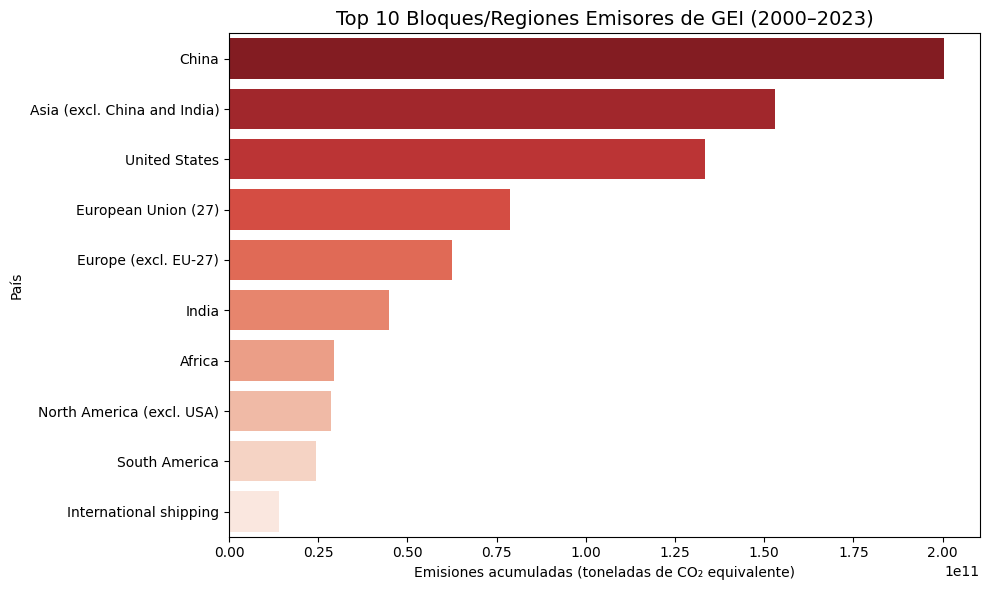

In [77]:
top_anual_co = (
    anual_co.groupby('Entity')['Annual CO₂ emissions']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Graficar utilizando el índice y los valores de la Serie top_anual_co
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anual_co.index, x=top_anual_co.values, palette="Reds_r")
plt.title('Top 10 Bloques/Regiones Emisores de GEI (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂ equivalente)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [79]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.3 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 34.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pycountry

# Crear una lista de nombres de países reales reconocidos por pycountry
paises_reales = [country.name for country in pycountry.countries]

# En algunos casos pycountry tiene nombres diferentes (por ejemplo, "Côte d'Ivoire" vs "Ivory Coast")
# Podemos complementar con algunos nombres adicionales manualmente si es necesario
extras = ['Czechia', 'Democratic Republic of Congo', 'Micronesia (country)', 'North Macedonia']
paises_reales += extras

# Filtrar el DataFrame para conservar solo países reales
greenhouse_ = greenhouse_[greenhouse_['Entity'].isin(paises_reales)]

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_3644\1585487129.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_greeenhouse.index, x=top_greeenhouse.values, palette="Blues_r")


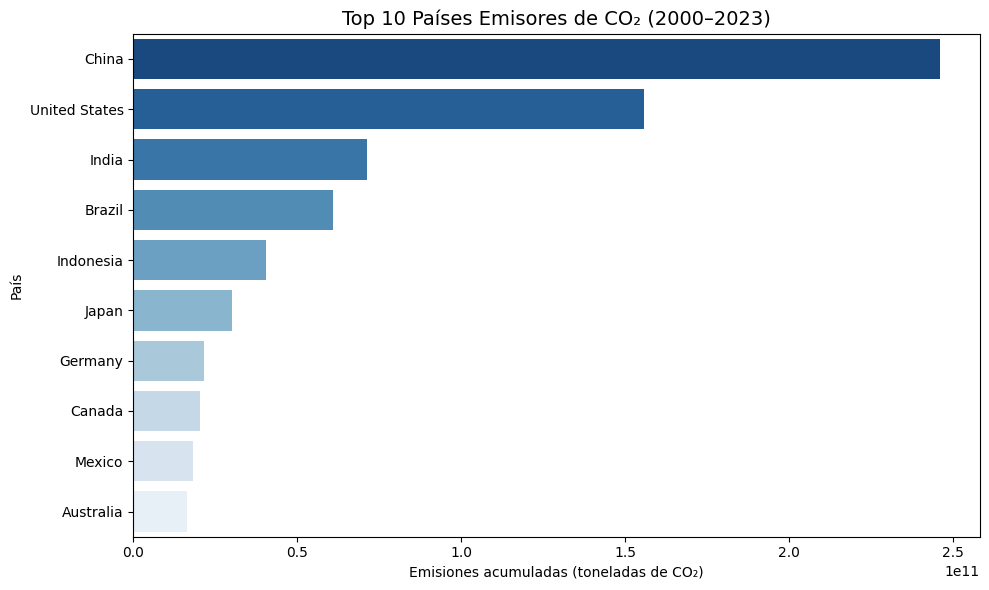

In [84]:
top_greeenhouse = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Gráfico utilizando el índice y los valores de la Serie top_greeenhouse
plt.figure(figsize=(10, 6))
sns.barplot(y=top_greeenhouse.index, x=top_greeenhouse.values, palette="Blues_r")
plt.title('Top 10 Países Emisores de CO₂ (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [85]:
top10 = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

In [86]:
comparacion = greenhouse_[
    (greenhouse_['Entity'].isin(top10)) & 
    (greenhouse_['Year'].isin([2000, 2023]))
]

In [87]:
# Ordenar los datos por las emisiones anuales en orden descendente
comparacion_ordenada = comparacion.sort_values(by='Annual greenhouse gas emissions in CO₂ equivalents', ascending=False)

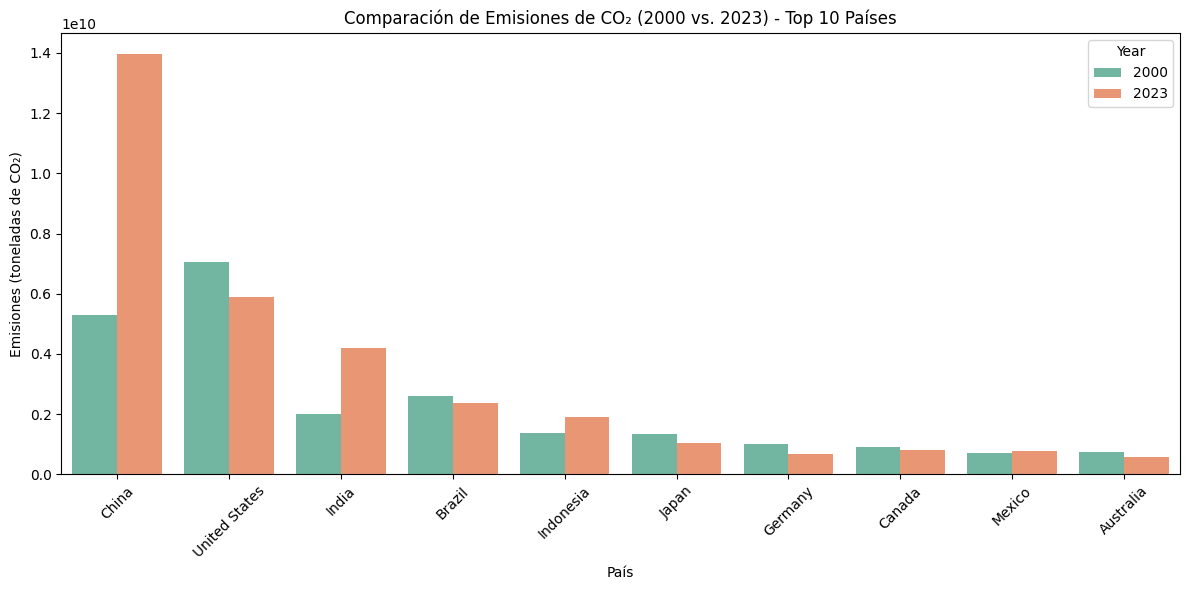

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=comparacion_ordenada,
    x='Entity',
    y='Annual greenhouse gas emissions in CO₂ equivalents',
    hue='Year',
    palette='Set2'
)
plt.title('Comparación de Emisiones de CO₂ (2000 vs. 2023) - Top 10 Países')
plt.ylabel('Emisiones (toneladas de CO₂)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()